In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def handled_input(output:str):
    s = input(output)
    while True:
        try:
            s = float(s)
            if s < 0:
                s = input(output)
                continue
            break
        except ValueError:
            s = input('Wring input.' + output)
    return s

In [2]:
# input

S = handled_input('Current Stock Price:')
u = handled_input('Up Factor :')
d = handled_input('Down Factor :')
while u < d:
    u = handled_input('Up Factor :')
    d = handled_input('Down Factor :')
r =  handled_input('Risk-free Rate per Period (%):')/100
R = round(math.exp(r), 2)
p = (R - d)/(u - d)
X = handled_input('Strike Price:')

n = input('Period:')

while True:
    try:
        n = int(n)
        if n <= 0:
            n = input('Wrong input,it should be a positive integer. Period:')
            continue
        break
    except ValueError:
        n = input('Wrong input, it must be an integer. Period:')

Current Stock Price: 160
Up Factor : 1.5
Down Factor : 0.5
Risk-free Rate per Period (%): 18.232
Strike Price: 150
Period: 3


In [3]:
# Call
C_tree = np.zeros((n+1, n+1))
P_tree = np.zeros((n+1, n+1))


for j in range(n+1):
    C_tree[n, j] = round(max(S * (u**(n-j)) * (d**j) - X, 0), 3)
    P_tree[n, j] = round(max(X - S * (u**(n-j)) * (d**j), 0), 3)


for i in reversed(range(n)):
    for j in range(i+1):
        C_tree[i, j] = round((p * C_tree[i+1, j] + (1-p) * C_tree[i+1, j+1]) / R, 3)
        P_tree[i, j] = round((p * P_tree[i+1, j] + (1-p) * P_tree[i+1, j+1]) / R, 3)

print('Call value is ' + str(C_tree[0, 0]) + '.')
print('Put value is ' + str(P_tree[0, 0]) + '.')

Call value is 85.069.
Put value is 11.875.


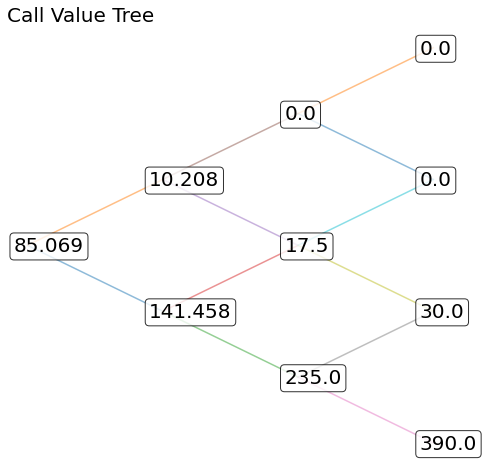

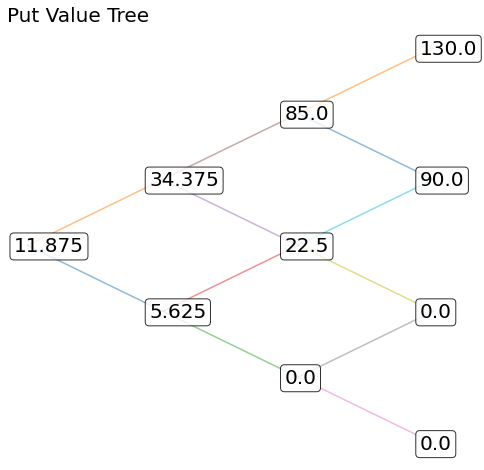

In [4]:
#drawing

x = []
y = []
s = []
for i in range(n+1):
    for j in range(i+1):
        x.append(i)
        y.append(j-i/2)
        s.append(C_tree[i, j])
# plt.figure(figsize=(16,16))
plt.figure(figsize=(8,8))
for i in range(n):
    for j in range(i+1):
        plt.plot([i, i+1], [j-i/2, j-(i+1)/2], alpha = 0.5)
        plt.plot([i, i+1], [j-i/2, j+1-(i+1)/2], alpha = 0.5)

for i in range(len(x)):
    plt.text(x[i]-0.1, y[i]-0.05, s[i], bbox=dict(facecolor='White', alpha=0.8, boxstyle='round, pad = 0.2, rounding_size = 0.2'), fontsize=20)
plt.axis('off')
plt.title('Call Value Tree', size = 20,loc = 'left')
# plt.savefig('/C_tree.png')
plt.show()

x = []
y = []
s = []
for i in range(n+1):
    for j in range(i+1):
        x.append(i)
        y.append(j-i/2)
        s.append(P_tree[i, j])
# plt.figure(figsize=(16,16))
plt.figure(figsize=(8,8))
for i in range(n):
    for j in range(i+1):
        plt.plot([i, i+1], [j-i/2, j-(i+1)/2], alpha = 0.5)
        plt.plot([i, i+1], [j-i/2, j+1-(i+1)/2], alpha = 0.5)

for i in range(len(x)):
    plt.text(x[i]-0.1, y[i]-0.05, s[i], bbox=dict(facecolor='White', alpha=0.8, boxstyle='round, pad = 0.2, rounding_size = 0.2'), fontsize=20)
plt.axis('off')
plt.title('Put Value Tree', size = 20,loc = 'left')
# plt.savefig('P_tree.png')
plt.show()